In [1]:
# Let's load and inspect the dataset to make adjustments accordingly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# Load the train and test datasets
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test (1).csv')


In [4]:
# Display the first few rows of the train dataset to understand the structure and attributes
train_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9344,15798749,Davidson,845,Germany,Female,43,3,152063.59,2,1,0,97910.06,0
1,3788,15644174,Marchesi,638,Germany,Male,27,4,135096.05,1,1,1,186523.72,1
2,944,15781465,Schofield,675,Germany,Female,29,8,121326.42,1,1,0,133457.52,0
3,1453,15774882,Mazzanti,687,France,Female,35,3,99587.43,1,1,1,1713.10,1
4,9470,15674573,Gearhart,713,France,Female,25,4,121172.97,1,1,1,56268.98,0


The dataset has the following attributes:

RowNumber: Index of the row.
CustomerId: Unique ID for the customer.

Surname: Last name of the customer.

CreditScore: Credit score of the customer.

Geography: Country of the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Tenure: Number of years the customer has been with the bank.

Balance: Account balance of the customer.

NumOfProducts: Number of products the customer has.

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no).

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no).

EstimatedSalary: Estimated salary of the customer.

Exited: Whether the customer left the bank (1 = exited, 0 = not exited).


drop irrelevant columns (such as RowNumber, CustomerId, Surname) and possibly transform categorical data (Geography, Gender) into numerical values. Let's proceed with that transformation and build the models.


In [5]:
# Drop irrelevant columns for model training
train_data_cleaned = train_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical columns into dummy variables (One-hot encoding for Geography and Gender)
train_data_cleaned = pd.get_dummies(train_data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Checking the cleaned dataset
train_data_cleaned.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,845,43,3,152063.59,2,1,0,97910.06,0,True,False,False
1,638,27,4,135096.05,1,1,1,186523.72,1,True,False,True
2,675,29,8,121326.42,1,1,0,133457.52,0,True,False,False
3,687,35,3,99587.43,1,1,1,1713.10,1,False,False,False
4,713,25,4,121172.97,1,1,1,56268.98,0,False,False,False


In [6]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.1+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000

In [7]:
# Display first few rows of the train data
print("\nTrain Data Sample:")
print(train_data.head())


Train Data Sample:
   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0       9344    15798749   Davidson          845   Germany  Female   43   
1       3788    15644174   Marchesi          638   Germany    Male   27   
2        944    15781465  Schofield          675   Germany  Female   29   
3       1453    15774882   Mazzanti          687    France  Female   35   
4       9470    15674573   Gearhart          713    France  Female   25   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3  152063.59              2          1               0   
1       4  135096.05              1          1               1   
2       8  121326.42              1          1               0   
3       3   99587.43              1          1               1   
4       4  121172.97              1          1               1   

   EstimatedSalary  Exited  
0         97910.06       0  
1        186523.72       1  
2        133457.52       0  
3          1713.

In [8]:
# Display basic statistics
print("\nTrain Data Statistics:")
print(train_data.describe())




Train Data Statistics:
          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   8000.000000  8.000000e+03   8000.00000  8000.000000  8000.000000   
mean    4970.286625  1.569083e+07    650.75075    38.689875     4.999375   
std     2881.577895  7.208562e+04     96.39294    10.417414     2.887069   
min        3.000000  1.556570e+07    350.00000    18.000000     0.000000   
25%     2488.500000  1.562778e+07    584.00000    32.000000     2.000000   
50%     4935.500000  1.569051e+07    652.00000    37.000000     5.000000   
75%     7473.250000  1.575358e+07    718.00000    44.000000     7.000000   
max    10000.000000  1.581569e+07    850.00000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    8000.000000    8000.000000  8000.000000     8000.000000   
mean    76439.133676       1.530250     0.707750        0.512750   
std     62472.987871       0.579333     0.454825        0.499869   
min         0.00000


Missing Values in Train Data:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


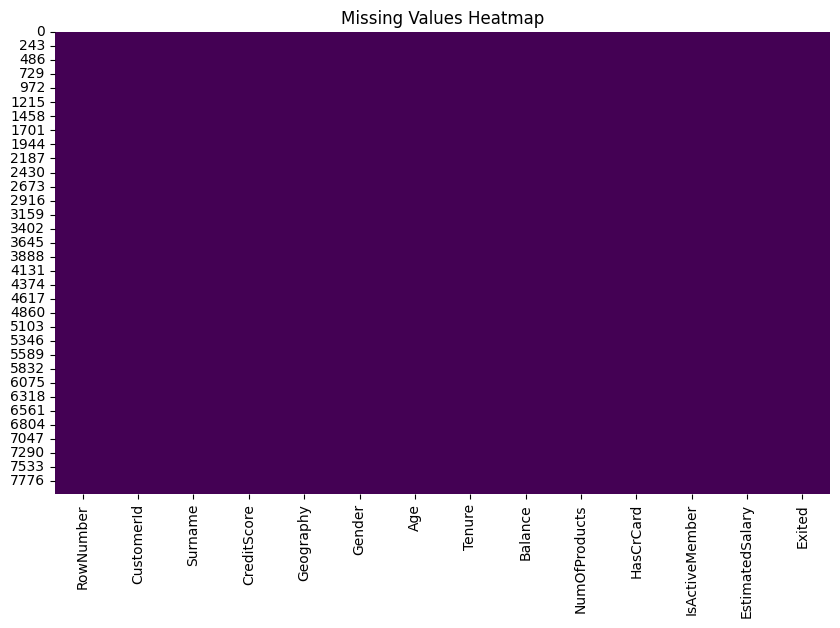

In [9]:
# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [10]:
# Count the unique values of categorical variables if any
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(train_data[col].value_counts())



Unique values in Surname:
Surname
Smith         27
Martin        25
Scott         25
Yeh           23
Genovese      22
              ..
Kuykendall     1
Sorenson       1
Candler        1
Moyes          1
Marrero        1
Name: count, Length: 2576, dtype: int64

Unique values in Geography:
Geography
France     4019
Spain      2004
Germany    1977
Name: count, dtype: int64

Unique values in Gender:
Gender
Male      4361
Female    3639
Name: count, dtype: int64


In [11]:
# Drop unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
train_data = train_data.drop(columns=columns_to_drop)


In [12]:
# Identify features and target variable
X = train_data.drop('Exited', axis=1)  # Features
y = train_data['Exited']                 # Target variable


In [13]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()



In [14]:
# Import necessary libraries
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer


# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),          # Normalize numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode categorical features
    ]
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Convert to DataFrame for better usability
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + ohe_feature_names.tolist()
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Display the first few rows of the processed data
print(X_processed_df.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     2.015307  0.413768 -0.692571  1.210590       0.810897   0.642595   
1    -0.132287 -1.122218 -0.346177  0.938975      -0.915334   0.642595   
2     0.251582 -0.930219  1.039398  0.718552      -0.915334   0.642595   
3     0.376081 -0.354225 -0.692571  0.370556      -0.915334   0.642595   
4     0.645827 -1.314216 -0.346177  0.716096      -0.915334   0.642595   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -1.025834        -0.038562                1.0              0.0   
1        0.974817         1.498236                1.0              0.0   
2       -1.025834         0.577926                1.0              0.0   
3        0.974817        -1.706874                0.0              0.0   
4        0.974817        -0.760729                0.0              0.0   

   Gender_Male  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          0.0  


In [15]:
# Assuming you've already run the preprocessing steps and created X_processed_df

# Splitting the standardized data into features (X) and target (y)
X = X_processed_df  # Use the standardized data
y = train_data_cleaned['Exited']  # Target variable

# Split the dataset into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Function to evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

In [18]:
# Initialize dictionary to store results
metrics_results = {}

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
metrics_results['Logistic Regression'] = evaluate_model(y_test, log_reg_pred)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
metrics_results['Naive Bayes'] = evaluate_model(y_test, nb_pred)

# K-Nearest Neighbors (k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
metrics_results['K-Nearest Neighbors'] = evaluate_model(y_test, knn_pred)

# Support Vector Machine (RBF Kernel)
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
svm_rbf_pred = svc_model.predict(X_test)
metrics_results['SVM (RBF)'] = evaluate_model(y_test, svm_rbf_pred)

In [19]:
# Create a dataframe to store metrics for comparison
metrics_df = pd.DataFrame({
    'Model': list(metrics_results.keys()),
    'Accuracy': [result[0] for result in metrics_results.values()],
    'Precision': [result[1] for result in metrics_results.values()],
    'Recall': [result[2] for result in metrics_results.values()],
    'F1 Score': [result[3] for result in metrics_results.values()],
})

# Display the metrics comparison
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.811667   0.596591  0.216049  0.317221
1          Naive Bayes  0.818333   0.596154  0.318930  0.415550
2  K-Nearest Neighbors  0.825833   0.593923  0.442387  0.507075
3            SVM (RBF)  0.859583   0.804082  0.405350  0.538988


Overall Performance:

The Support Vector Machine (SVM) model achieved the highest accuracy (85.96%) among all models, indicating it performed best in classifying the target variable correctly.

Precision:
SVM also had the highest precision (80.41%), meaning that when it predicted a positive class, it was correct 80.41% of the time. This indicates a lower rate of false positives.

Recall:
The K-Nearest Neighbors (KNN) model exhibited the highest recall (44.24%), suggesting it was better at identifying actual positive cases (though still low overall).

F1 Score:
The Naive Bayes model had the highest F1 score (0.4155), indicating a balance between precision and recall, although all models had relatively low scores, suggesting room for improvement.

Conclusion:
While SVM stands out with high accuracy and precision, all models could benefit from further tuning or additional data to improve recall and F1 scores, especially in detecting positive cases effectively. Consider experimenting with hyperparameter tuning or exploring other models/ensemble methods to enhance performance.

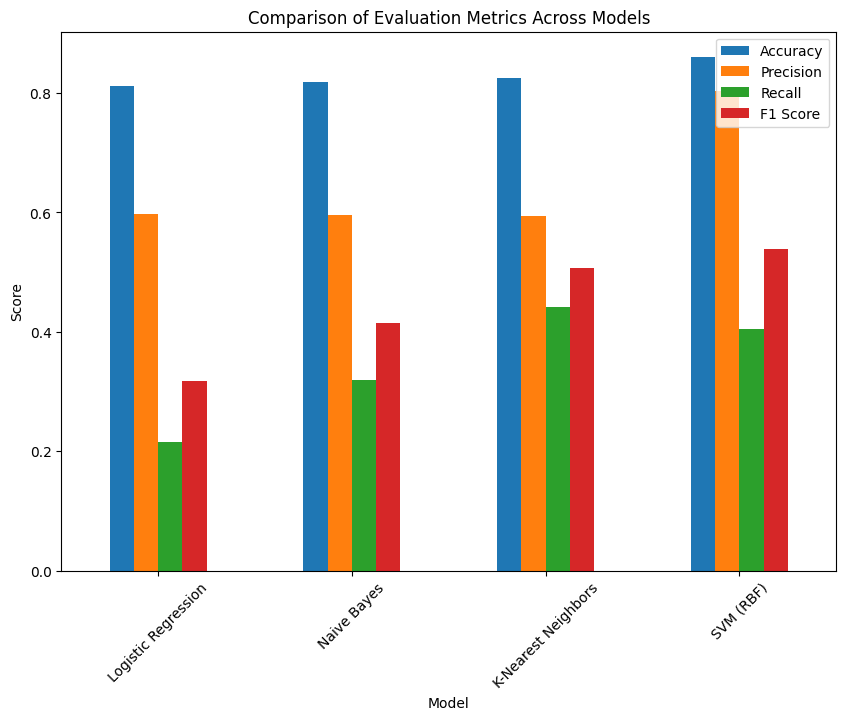

In [20]:
# Visualization of model evaluation metrics
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 7))
plt.title("Comparison of Evaluation Metrics Across Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


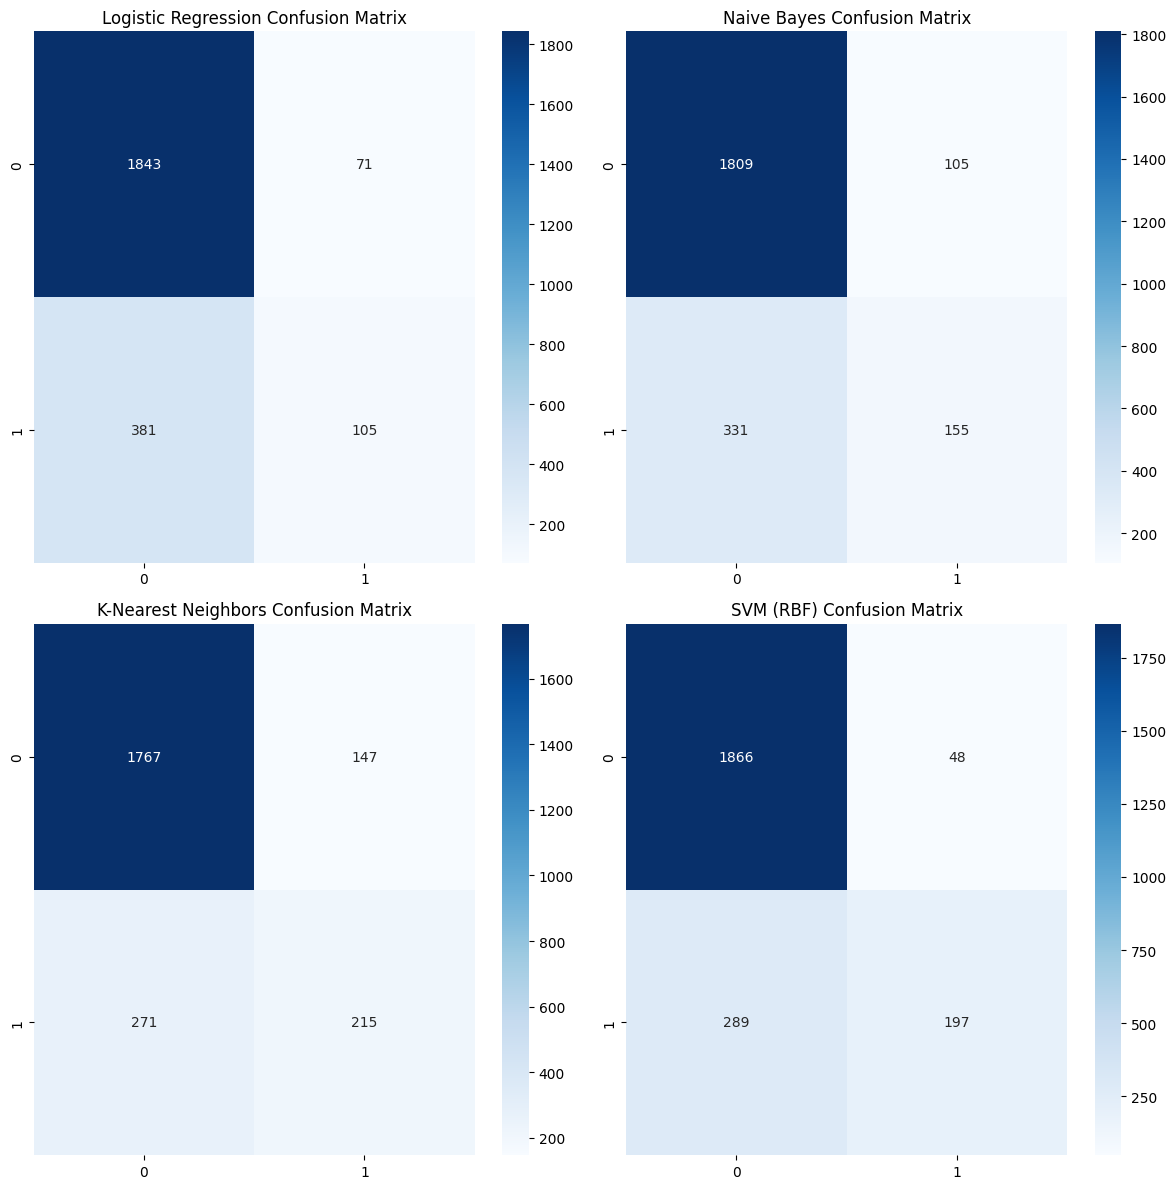

In [21]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Logistic Regression Confusion Matrix
sns.heatmap(metrics_results['Logistic Regression'][4], annot=True, fmt='d', ax=axes[0, 0], cmap="Blues")
axes[0, 0].set_title('Logistic Regression Confusion Matrix')

# Naive Bayes Confusion Matrix
sns.heatmap(metrics_results['Naive Bayes'][4], annot=True, fmt='d', ax=axes[0, 1], cmap="Blues")
axes[0, 1].set_title('Naive Bayes Confusion Matrix')

# KNN Confusion Matrix
sns.heatmap(metrics_results['K-Nearest Neighbors'][4], annot=True, fmt='d', ax=axes[1, 0], cmap="Blues")
axes[1, 0].set_title('K-Nearest Neighbors Confusion Matrix')

# SVM Confusion Matrix
sns.heatmap(metrics_results['SVM (RBF)'][4], annot=True, fmt='d', ax=axes[1, 1], cmap="Blues")
axes[1, 1].set_title('SVM (RBF) Confusion Matrix')

plt.tight_layout()
plt.show()

In [22]:


# Generate predictions for all models and save them as CSV for Kaggle submission
predictions_df = pd.DataFrame({
    'Row Number': np.arange(len(X_test)),  # Make sure X_test is defined
    'Logistic Regression': log_reg_pred,    # Predictions from Logistic Regression
    'Naive Bayes': nb_pred,                 # Predictions from Naive Bayes
    'KNN (k=3)': knn_pred,                  # Predictions from KNN
    'SVM (RBF)': svm_rbf_pred               # Predictions from SVM
})

# Saving to CSV in the current working directory
predictions_df.to_csv('model_predictions_final.csv', index=False)
print("Predictions saved as 'model_predictions.csv'")


Predictions saved as 'model_predictions.csv'
